In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [10]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key

In [11]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name)

# Set up list to pull in the data
cityname= []
lat= []
lng= []
max_temp = []
humidity = []
cloudiness = []
wind_speed= []
country= []
date= []
count = 0

#Loop through cities to pull out weather data
for city in cities:
    weather_response= requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json= weather_response.json()
    #Set up try/except to skip over the cities that do not have information.
    try:
        cityname.append(weather_json['city']['name'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("Done")

Processing record 1 of Set 1 | olafsvik
Processing record 2 of Set 1 | beamsville
Record not found
Processing record 3 of Set 1 | bredasdorp
Record not found
Processing record 4 of Set 1 | victoria
Processing record 5 of Set 1 | butaritari
Processing record 6 of Set 1 | mataura
Processing record 7 of Set 1 | adrar
Processing record 8 of Set 1 | port alfred
Processing record 9 of Set 1 | busselton
Processing record 10 of Set 1 | rikitea
Processing record 11 of Set 1 | punta arenas
Processing record 12 of Set 1 | palauig
Processing record 13 of Set 1 | phaphund
Processing record 14 of Set 1 | ushuaia
Processing record 15 of Set 1 | hilo
Processing record 16 of Set 1 | paamiut
Processing record 17 of Set 1 | cravo norte
Processing record 18 of Set 1 | corinth
Processing record 19 of Set 1 | bambous virieux
Processing record 20 of Set 1 | lafia
Processing record 21 of Set 1 | hobart
Processing record 22 of Set 1 | dikson
Processing record 23 of Set 1 | qaanaaq
Processing record 24 of Set 1

Processing record 193 of Set 1 | sur
Processing record 194 of Set 1 | davila
Processing record 195 of Set 1 | barrow
Processing record 196 of Set 1 | hambantota
Processing record 197 of Set 1 | ahuimanu
Processing record 198 of Set 1 | saint-philippe
Processing record 199 of Set 1 | xingcheng
Processing record 200 of Set 1 | guerrero negro
Processing record 201 of Set 1 | sitka
Processing record 202 of Set 1 | moron
Processing record 203 of Set 1 | hervey bay
Processing record 204 of Set 1 | zharkent
Processing record 205 of Set 1 | winneba
Processing record 206 of Set 1 | dogondoutchi
Record not found
Processing record 207 of Set 1 | monrovia
Processing record 208 of Set 1 | batticaloa
Processing record 209 of Set 1 | mollendo
Processing record 210 of Set 1 | la asuncion
Record not found
Processing record 211 of Set 1 | sao filipe
Processing record 212 of Set 1 | villa union
Processing record 213 of Set 1 | bilma
Processing record 214 of Set 1 | trincomalee
Processing record 215 of Se

Processing record 380 of Set 1 | coquimbo
Processing record 381 of Set 1 | aljezur
Processing record 382 of Set 1 | kahului
Processing record 383 of Set 1 | bathsheba
Processing record 384 of Set 1 | acapulco
Processing record 385 of Set 1 | maniitsoq
Processing record 386 of Set 1 | yerbogachen
Record not found
Processing record 387 of Set 1 | aberystwyth
Processing record 388 of Set 1 | requena
Processing record 389 of Set 1 | terra santa
Processing record 390 of Set 1 | novikovo
Processing record 391 of Set 1 | odienne
Processing record 392 of Set 1 | alta floresta
Processing record 393 of Set 1 | castlerea
Processing record 394 of Set 1 | qena
Processing record 395 of Set 1 | oparino
Processing record 396 of Set 1 | foumban
Processing record 397 of Set 1 | kondopoga
Processing record 398 of Set 1 | sambava
Processing record 399 of Set 1 | vila
Processing record 400 of Set 1 | bose
Processing record 401 of Set 1 | kotido
Processing record 402 of Set 1 | east millcreek
Processing rec

In [12]:
# Create DataFram
city_data = pd.DataFrame({"City": cityname,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date})
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olafsvik,64.8945,-23.7142,49.73,69,64,9.71,IS,1595451600
1,Beamsville,43.1668,-79.4829,79.81,74,95,8.30,CA,1595451600
2,Bredasdorp,-34.5322,20.0403,51.31,92,0,3.06,ZA,1595451600
3,Hong Kong,22.2855,114.1577,84.29,76,47,6.96,HK,1595451600
4,Butaritari,3.0707,172.7902,83.41,75,52,15.19,KI,1595451600
...,...,...,...,...,...,...,...,...,...
562,Anajatuba,-3.2644,-44.6197,85.03,50,37,2.06,BR,1595451600
563,Poshekhon'ye,58.4993,39.1353,55.54,90,40,6.60,RU,1595451600
564,Itagibá,-14.2836,-39.8428,74.53,56,2,4.59,BR,1595451600
565,Babaeski,41.4325,27.0931,72.05,66,0,8.46,TR,1595451600


In [15]:
# Save city data into a csv file
city_data.to_csv('city_data.csv')

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

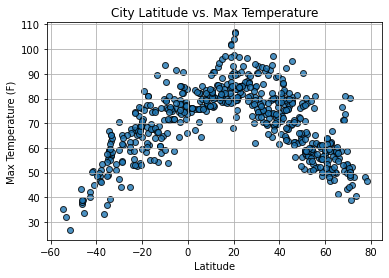

In [22]:
# Plotting the Data
# Temperature (F) vs. Latitude
x_lat = city_data["Lat"]
y_temp= city_data["Max Temp"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

Text(0.5, 1.0, 'City Latitude vs. Humidity')

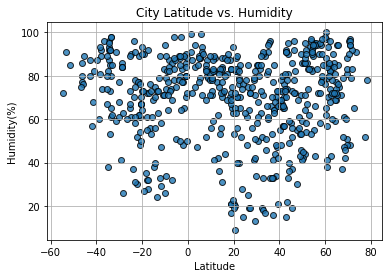

In [23]:
# Humidity (%) vs. Latitude
y_temp= city_data["Humidity"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

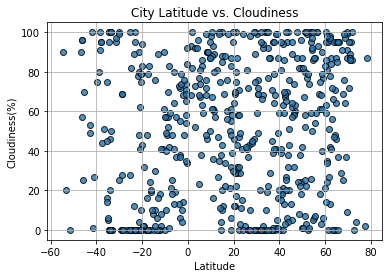

In [25]:
# Cloudiness (%) vs. Latitude
y_temp= city_data["Cloudiness"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

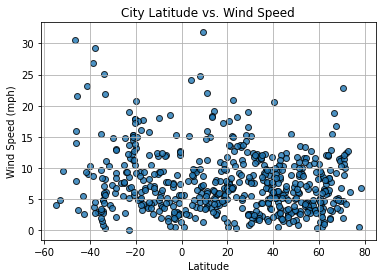

In [26]:
# Wind Speed (mph) vs. Latitude
y_temp= city_data["Wind Speed"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_data.loc[city_data["Lat"] >= 0,:]
southern = city_data.loc[city_data["Lat"] < 0,:]

The r-squared is: -0.7386621417251249


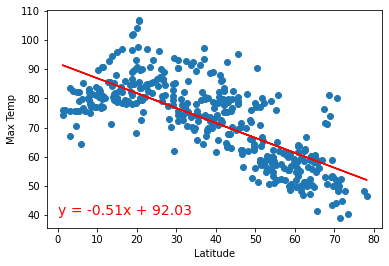

In [38]:
# Northern Hemishphere Latitude vs. Max Termperature
xn_lat = northern["Lat"]
yn_temp = northern["Max Temp"]
plot_linear_regression(xn_lat,yn_temp,'Max Temp',(0,40))

plt.show()

The r-squared is: 0.8099710842865838


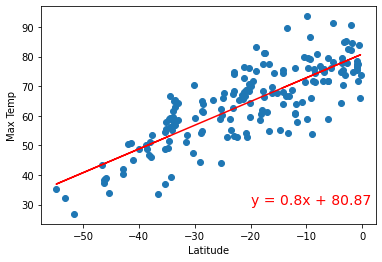

In [40]:
# Southern Hemishphere Latitude vs. Max Termperature
xs_lat = southern["Lat"]
ys_temp = southern["Max Temp"]
plot_linear_regression(xs_lat,ys_temp,'Max Temp',(-20,30))

plt.show()

The r-squared is: -0.7386621417251249


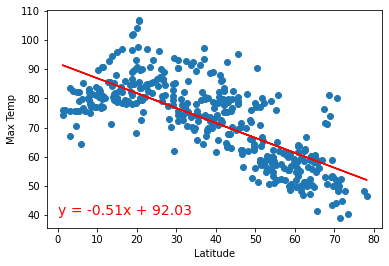

In [41]:
# Northern Latitude vs. Humidity
xn_lat = northern["Lat"]
yn_humid = northern["Humidity"]
plot_linear_regression(xn_lat,yn_temp,'Max Temp',(0,40))

plt.show()

The r-squared is: 0.8099710842865838


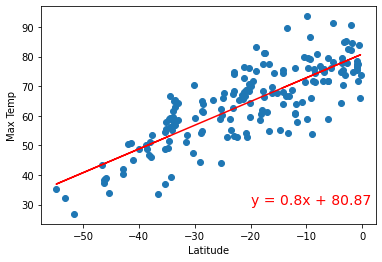

In [42]:
# Southern Latitude vs. Humidity
xs_lat = southern["Lat"]
ys_humid = southern["Humidity"]
plot_linear_regression(xs_lat,ys_temp,'Max Temp',(-20,30))

plt.show()

The r-squared is: -0.7386621417251249


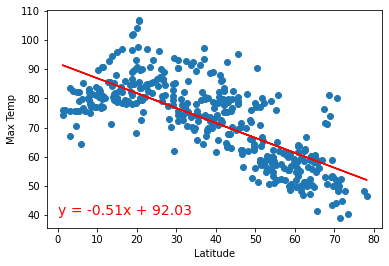

In [43]:
# Northern Latitude vs. Cloudiness
xn_lat = northern["Lat"]
yn_cloud = northern["Cloudiness"]
plot_linear_regression(xn_lat,yn_temp,'Max Temp',(0,40))

plt.show()

The r-squared is: 0.8099710842865838


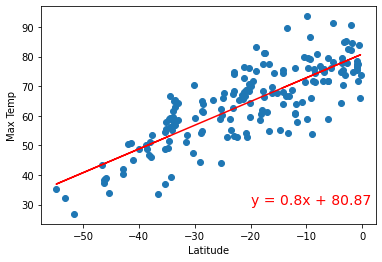

In [44]:
# Southern Latitude vs. Cloudiness
xs_lat = southern["Lat"]
ys_cloud = southern["Cloudiness"]
plot_linear_regression(xs_lat,ys_temp,'Max Temp',(-20,30))

plt.show()

The r-squared is: -0.7386621417251249


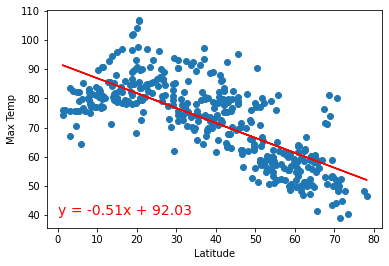

In [45]:
# Northern Latitude vs. Wind Speed
xn_lat = northern["Lat"]
yn_wind = northern["Wind Speed"]
plot_linear_regression(xn_lat,yn_temp,'Max Temp',(0,40))

plt.show()

The r-squared is: 0.8099710842865838


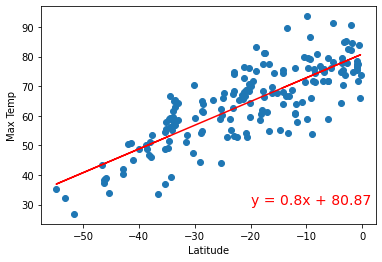

In [46]:
# Southern Latitude vs. Wind Speed
xs_lat = southern["Lat"]
ys_wind = southern["Wind Speed"]
plot_linear_regression(xs_lat,ys_temp,'Max Temp',(-20,30))

plt.show()